In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
A = {
    6:'level 3',
    1:'level 2',
    5:'level 1'
}

B = {
    1:'erdos',
    2:'barabasi',
    3:'facebbok',
    4:'us blogs'
}

C = {
    1:0.01,
    3:0.001
}

D = {
    1:'intolerant',
    4:'tolerant',
}

E = {
    1:'uniform',
    3:'normal'
}

# Tolarance

In [3]:
def logistic(x, B, mu):
    return 1/(1 + np.exp(-B*(x-mu)))

def prob_successful_propagation(strength, var, B, mu):
    prob = (strength*strength) + (1-strength) * (1-logistic(var, B, mu))
    return prob

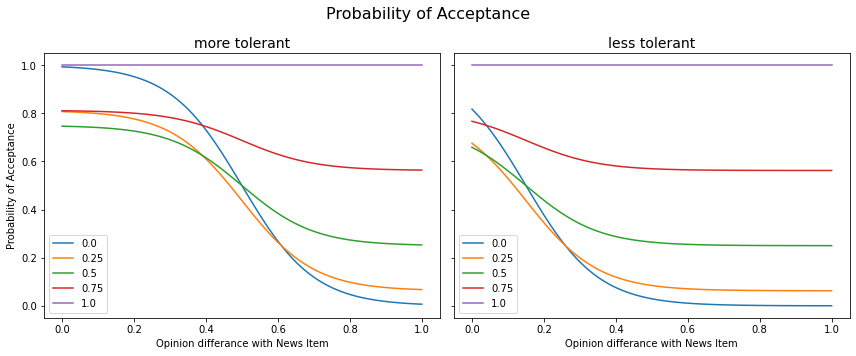

In [4]:
x_10 = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1,2, figsize=(12,5),sharey=True)
fig.suptitle("Probability of Acceptance", size=16)

for i in range(5):
    sns.lineplot(x_10, prob_successful_propagation(i*0.25, x_10, 10, 0.5),  ax=ax[0], label=str(i*0.25))
    sns.lineplot(x_10, prob_successful_propagation(i*0.25, x_10, 10, 0.15), ax=ax[1], label=str(i*0.25))


ax[0].set_title("more tolerant",size=14)
ax[1].set_title("less tolerant",size=14)

for axs in ax:
    axs.set_xlabel("Opinion differance with News Item")
    
ax[0].set_ylabel("Probability of Acceptance")



plt.tight_layout()
plt.show()

In [5]:
initial = pd.read_csv('./Experiments - Tolerant Case.csv')
initial_df = initial[['A', 'B', 'C', 'D', 'E', 'm_value','mean_abs_opinion','opinion_std','edge_homogenity','mean_strength','std_strength']]
initial_df.loc[:,'D'] = initial_df['D'].map(D)
initial_df.columns = ['News_Polarization', 'Graph_Type', 'Update_Size', 'Tolarance', 'Initial_Distribution', 'm_value','mean_abs_opinion','opinion_std','edge_homogenity','mean_strength','std_strength']
initial_df.head()

/home/ashwin/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,News_Polarization,Graph_Type,Update_Size,Tolarance,Initial_Distribution,m_value,mean_abs_opinion,opinion_std,edge_homogenity,mean_strength,std_strength
0,1,1,1,intolerant,1,3.518592,0.937207,0.922852,0.867265,0.070105,0.214014
1,1,1,1,intolerant,2,2.285785,0.270679,0.330151,0.059475,0.153088,0.357861
2,1,1,1,intolerant,3,2.494280,0.289612,0.390259,0.085188,0.129681,0.332959
3,1,1,1,tolerant,1,2.007261,0.129408,0.059526,0.021603,0.961523,0.146454
4,1,1,1,tolerant,2,2.000000,0.057893,0.010300,0.005597,0.997217,0.037665


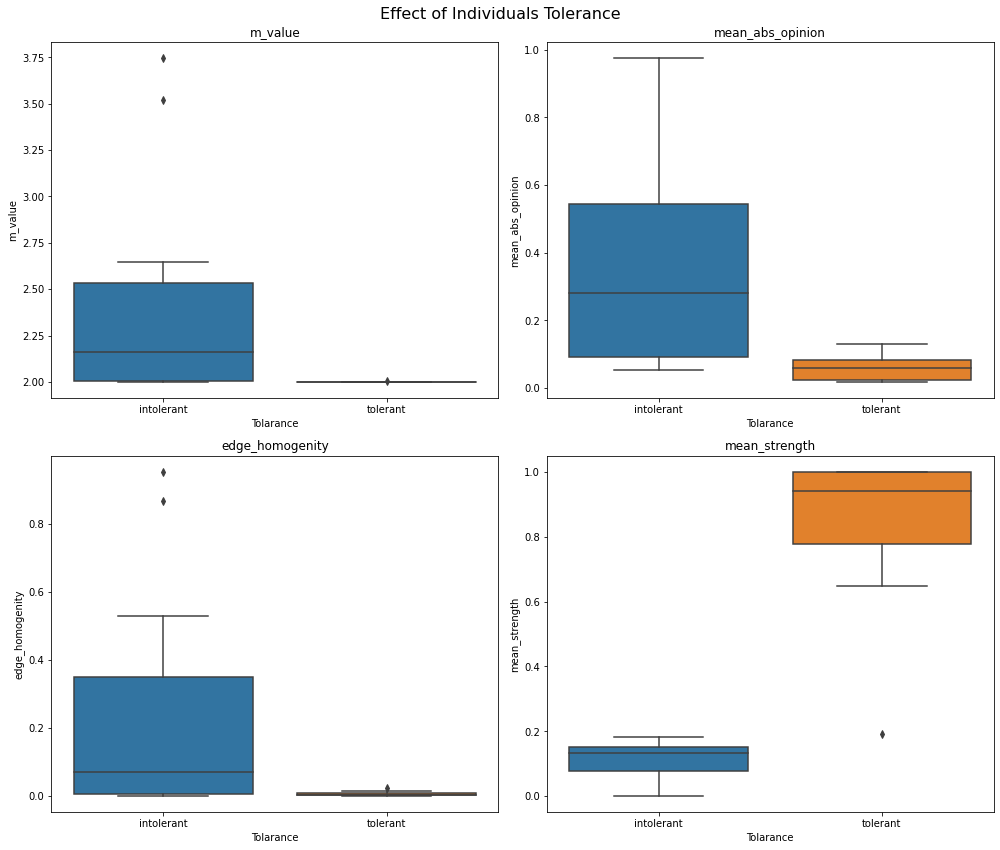

In [6]:
fig, ax = plt.subplots(2,2, figsize=(14,12),sharey=False)
fig.suptitle("Effect of Individuals Tolerance", size=16)

sns.boxplot(x="Tolarance", ax=ax[0,0], y="m_value", data=initial_df, ).set_title("m_value")
sns.boxplot(x="Tolarance", ax=ax[0,1], y="mean_abs_opinion", data=initial_df, ).set_title("mean_abs_opinion")
sns.boxplot(x="Tolarance", ax=ax[1,0], y="edge_homogenity", data=initial_df, ).set_title("edge_homogenity")
sns.boxplot(x="Tolarance", ax=ax[1,1], y="mean_strength", data=initial_df,).set_title("mean_strength")

plt.tight_layout()
plt.show()

In [7]:
df = pd.read_csv('./results.csv')

In [8]:
data = df[['A', 'B', 'C', 'D', 'E', 'm_value_auto','mean_abs_opinion','opinion_std','edge_homogenity','mean_strength','std_strength']]

In [9]:
data.loc[:,'A'] = data['A'].map(A)
data.loc[:,'B'] = data['B'].map(B)
data.loc[:,'C'] = data['C'].map(C)
data.loc[:,'D'] = data['D'].map(D)
data.loc[:,'E'] = data['E'].map(E)

/home/ashwin/.local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
data.columns = ['News_Polarization', 'Graph_Type', 'Update_Size', 'Tolarance', 'Initial_Distribution', 'm_value','mean_abs_opinion','opinion_std','edge_homogenity','mean_strength','std_strength']
data.head()

,News_Polarization,Graph_Type,Update_Size,Tolarance,Initial_Distribution,m_value,mean_abs_opinion,opinion_std,edge_homogenity,mean_strength,std_strength
0,level 1,us blogs,0.001,intolerant,uniform,2.369982,0.530566,0.547510,0.340282,0.000470,0.006314
1,level 2,us blogs,0.001,intolerant,uniform,3.272567,0.787939,0.827930,0.863379,0.002357,0.018370
2,level 1,barabasi,0.001,intolerant,uniform,3.454385,0.890479,0.869287,0.823784,0.012955,0.026576
3,level 1,erdos,0.001,intolerant,uniform,3.634430,0.919189,0.912842,0.850802,0.023015,0.031889
4,level 1,facebbok,0.001,intolerant,uniform,2.634671,0.729443,0.581860,0.751121,0.011977,0.034905


In [11]:
data.shape

(48, 11)

In [12]:
unif = data[data.Initial_Distribution == 'uniform'  ].drop(['Tolarance','Initial_Distribution'], axis=1).sort_values('News_Polarization')
norm = data[data.Initial_Distribution == 'normal'].drop(['Tolarance','Initial_Distribution'], axis=1).sort_values('News_Polarization')

# News Polarization

In [13]:
from scipy import stats
x1 = stats.beta.rvs(0.1, 0.1, size=10000)
x2 = stats.beta.rvs(0.2, 0.2, size=10000)
x3 = stats.beta.rvs(0.3, 0.3, size=10000)

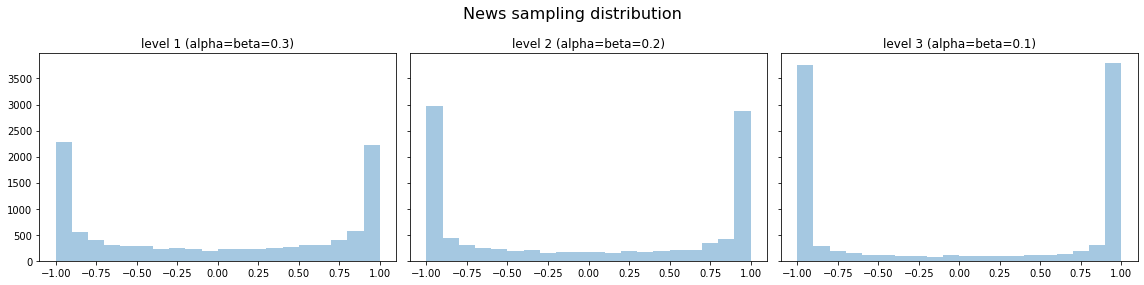

In [14]:
fig, ax = plt.subplots(1,3, figsize=(16,4),sharey=True)
fig.suptitle("News sampling distribution", size=16)
sns.distplot(-1+2*x1, ax=ax[2], bins=20,  kde=False,).set_title("level 3 (alpha=beta=0.1)")
sns.distplot(-1+2*x2, ax=ax[1], bins=20, kde=False).set_title("level 2 (alpha=beta=0.2)")
sns.distplot(-1+2*x3, ax=ax[0], bins=20,  kde=False).set_title("level 1 (alpha=beta=0.3)")
plt.tight_layout()
plt.show()

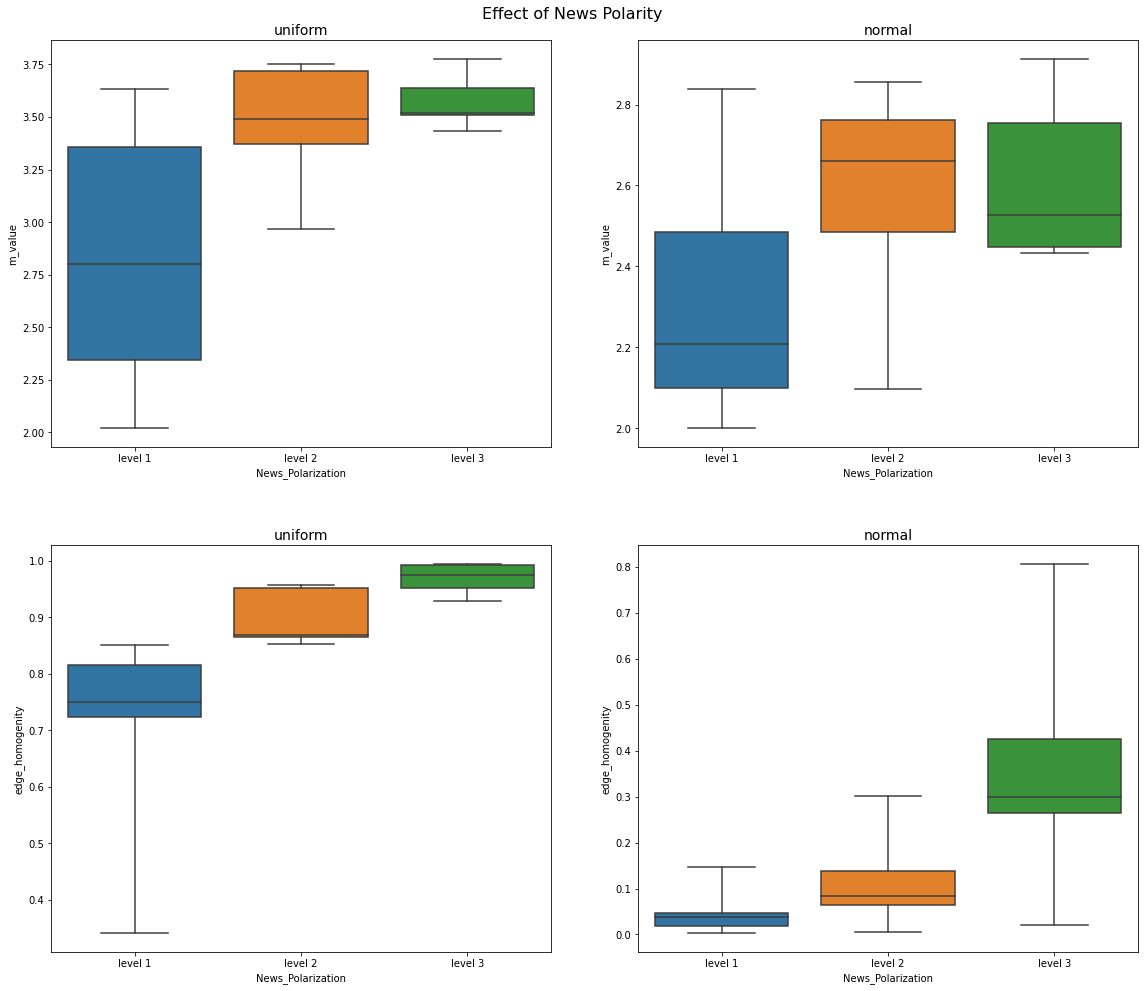

In [15]:
fig, ax = plt.subplots(2,2, figsize=(16,14))
fig.suptitle("Effect of News Polarity", size=16)

sns.boxplot(x="News_Polarization", ax=ax[0,0], y="m_value", data=unif, whis=np.inf).set_title("uniform",size=14)
sns.boxplot(x="News_Polarization", ax=ax[0,1], y="m_value", data=norm, whis=np.inf).set_title("normal",size=14)
sns.boxplot(x="News_Polarization", ax=ax[1,0], y="edge_homogenity", data=unif, whis=np.inf).set_title("uniform",size=14)
sns.boxplot(x="News_Polarization", ax=ax[1,1], y="edge_homogenity", data=norm, whis=np.inf).set_title("normal",size=14)

plt.tight_layout(h_pad=5, w_pad=5)
plt.show()

# Initial Distribution

In [16]:
x_1 = np.linspace(-1,1, 100)
y_1 = stats.norm.pdf(x_1, loc=0, scale=0.3)

x_2 = np.linspace(0,1, 100)
y_2 = stats.norm.pdf(x_2, loc=0.5, scale=0.15)

x_3 = np.linspace(0, 0.5, 100)
y_3 = [2]*len(x_3)

x_4 = np.linspace(-1, 1, 100)
y_4 = [0.5]*len(x_4)

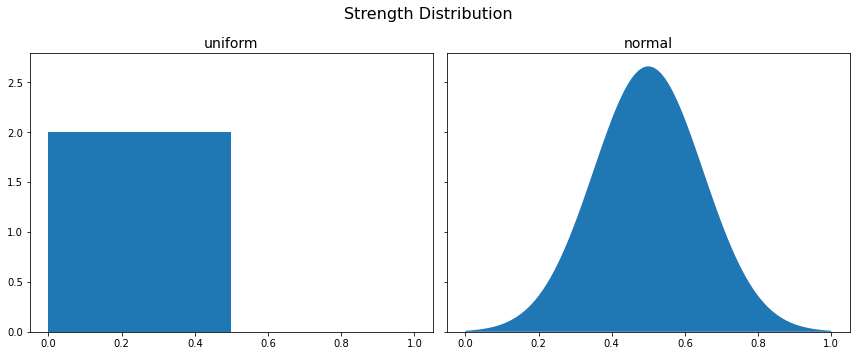

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,5),sharey=True, sharex=True)
fig.suptitle("Strength Distribution", size=16)

ax[0].stackplot(x_3, y_3, )
ax[1].stackplot(x_2, y_2, )

ax[0].set_title("uniform",size=14)
ax[1].set_title("normal",size=14)

plt.tight_layout()
plt.show()

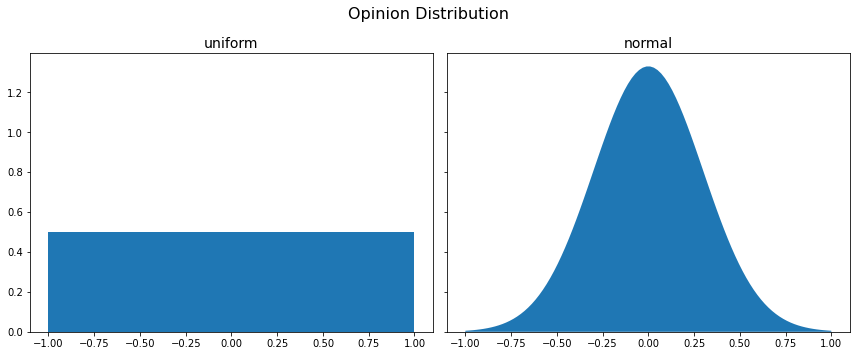

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,5),sharey=True, sharex=True)
fig.suptitle("Opinion Distribution", size=16)

ax[0].stackplot(x_4, y_4,)
ax[1].stackplot(x_1, y_1,)

ax[0].set_title("uniform",size=14)
ax[1].set_title("normal",size=14)


plt.tight_layout()
plt.show()

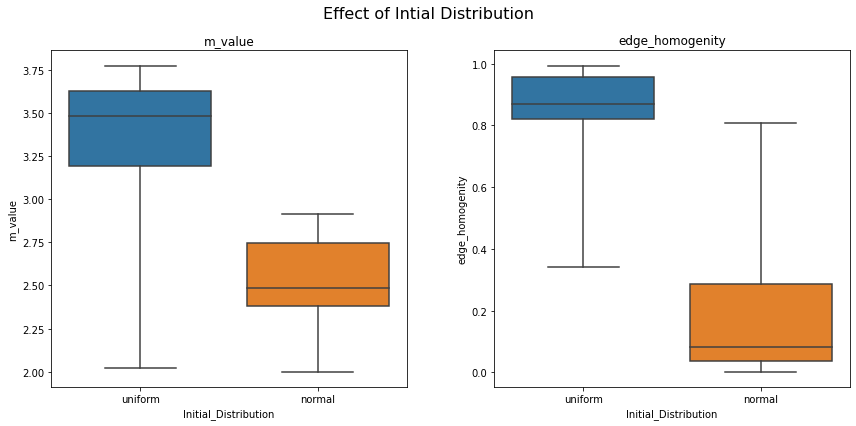

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Effect of Intial Distribution", size=16)

sns.boxplot(x="Initial_Distribution", ax=ax[0], y="m_value", data=data, whis=np.inf).set_title("m_value")
sns.boxplot(x="Initial_Distribution", ax=ax[1], y="edge_homogenity", data=data, whis=np.inf).set_title("edge_homogenity")

plt.tight_layout(h_pad=5, w_pad=5)
plt.show()